In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [18]:
# import dataset and take a brief look of the dataset
df = pd.read_csv('IBM-HR-Employee-Attrition-dataset.csv',on_bad_lines='skip')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [22]:
#find shape of dataset
df.shape

(1470, 35)

In [23]:
#get unique values of dataset for each feature
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [25]:
##Employee number is unique feature as it has 1470 unique values = no. of rows; now find null values in each feature
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [26]:
#No null data so no need to manipulate/fill the null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [30]:
df=df.drop(columns=['EmployeeNumber','EmployeeCount','StandardHours','Over18'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


<AxesSubplot: xlabel='Attrition', ylabel='count'>

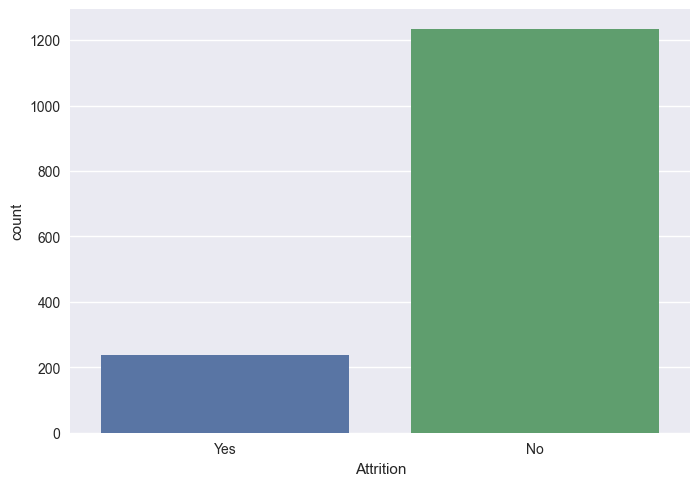

In [31]:
#Now use graphs to see how target variable is distributed
sns.countplot(x='Attrition',data=df)

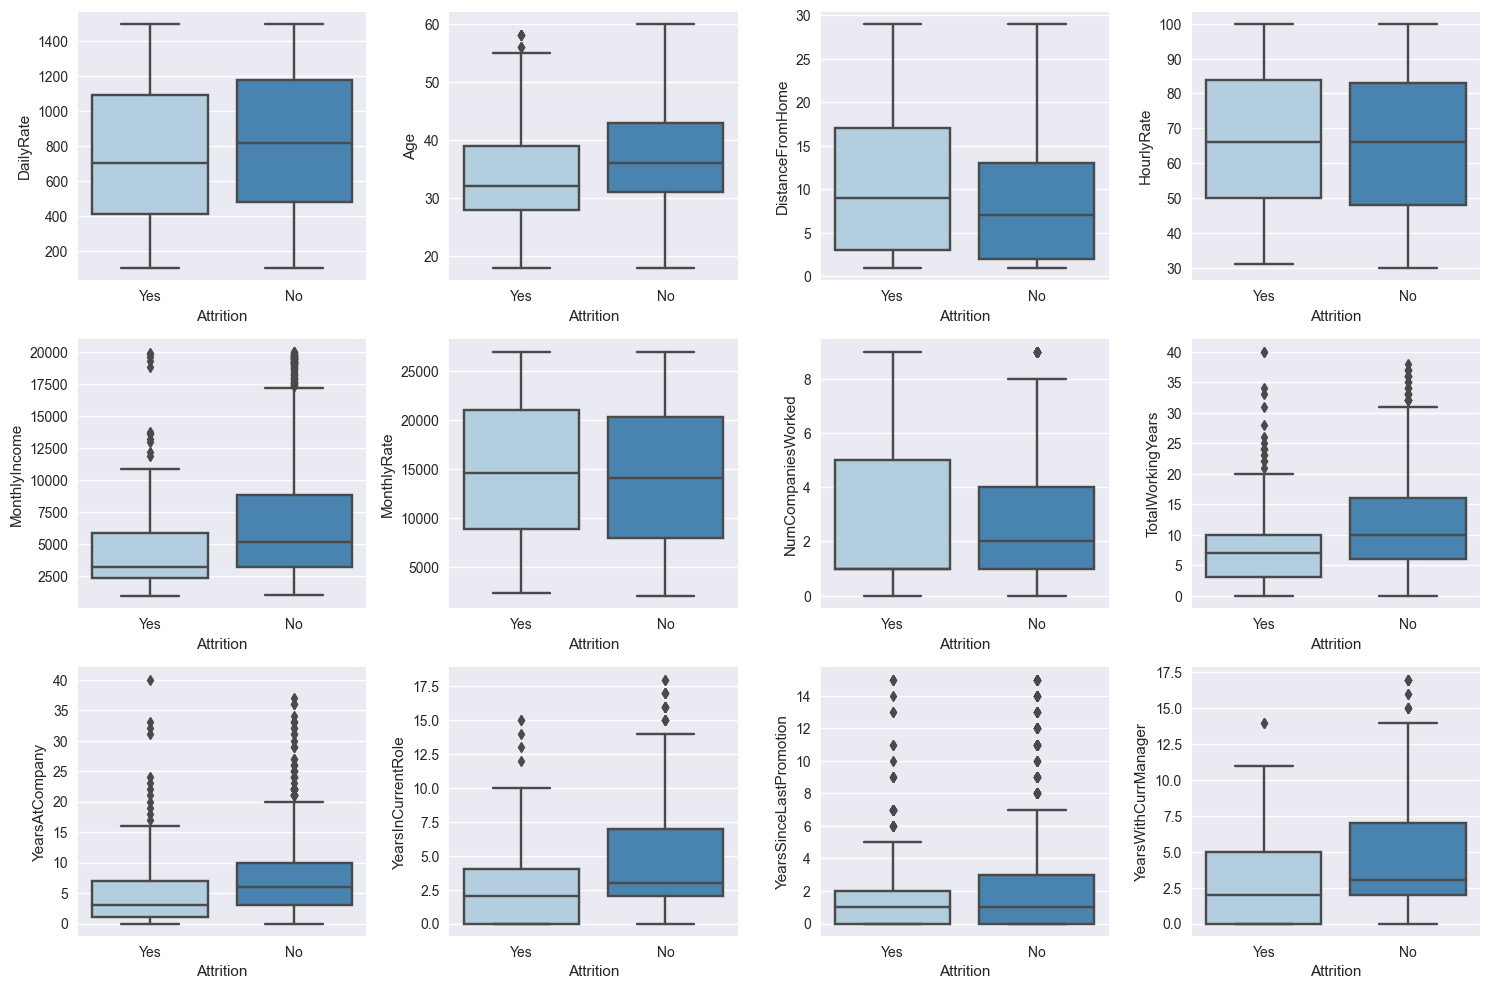

In [33]:
#Now we need to visualize the numerical features compared to target variable 'Attrition'
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y='DailyRate', data=df, ax=axss[0][0],palette='Blues')
sns.boxplot(x='Attrition', y='Age', data=df, ax=axss[0][1],palette='Blues')
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, ax=axss[0][2],palette='Blues')
sns.boxplot(x='Attrition', y='HourlyRate', data=df, ax=axss[0][3],palette='Blues')
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axss[1][0],palette='Blues')
sns.boxplot(x='Attrition', y='MonthlyRate', data=df, ax=axss[1][1],palette='Blues')
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df, ax=axss[1][2],palette='Blues')
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, ax=axss[1][3],palette='Blues')
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axss[2][0],palette='Blues')
sns.boxplot(x='Attrition', y='YearsInCurrentRole', data=df, ax=axss[2][1],palette='Blues')
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, ax=axss[2][2],palette='Blues')
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, ax=axss[2][3],palette='Blues')
plt.tight_layout()

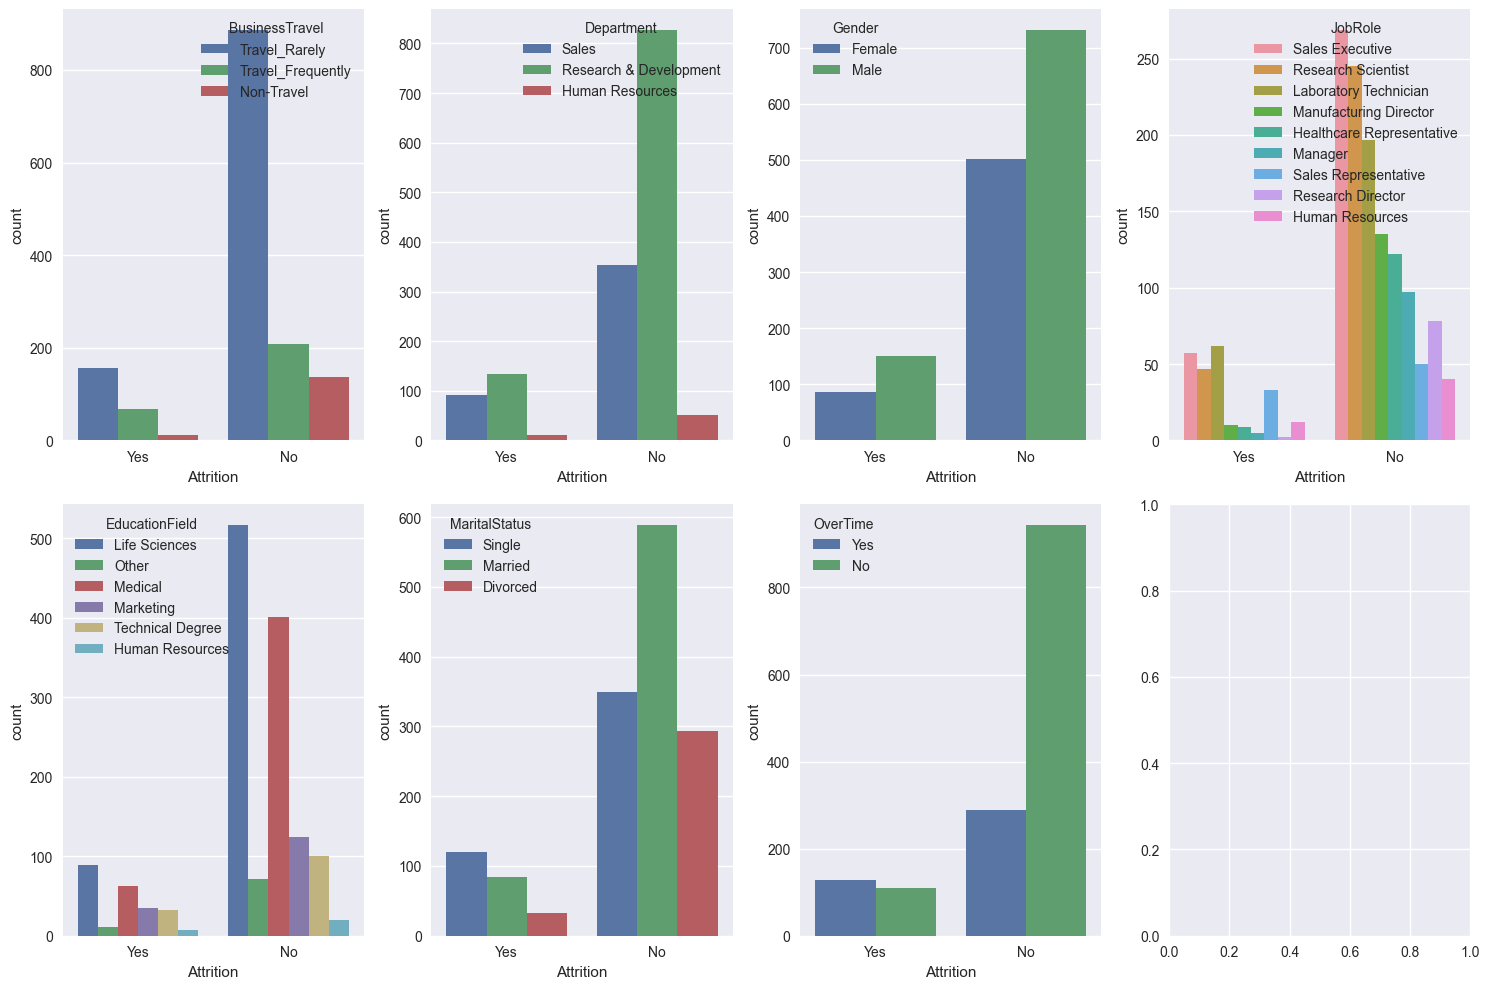

In [36]:
#Visualization of non-numeric features
fig, axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=df, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=df, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=df, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=df, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=df, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=df, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=df, ax=axss[1][2])
plt.tight_layout()

In [38]:
#Now we need to feature engineering on the data
#1. Transform Non-numerical feature into binary features(Yes/No to 1/0)
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})
df['OverTime']=df['OverTime'].map({'Yes':1,'No':0})

In [39]:
#Now we check correlation score between variables and target variable(Attrition)
corr_score = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']].corr()
corr_score

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


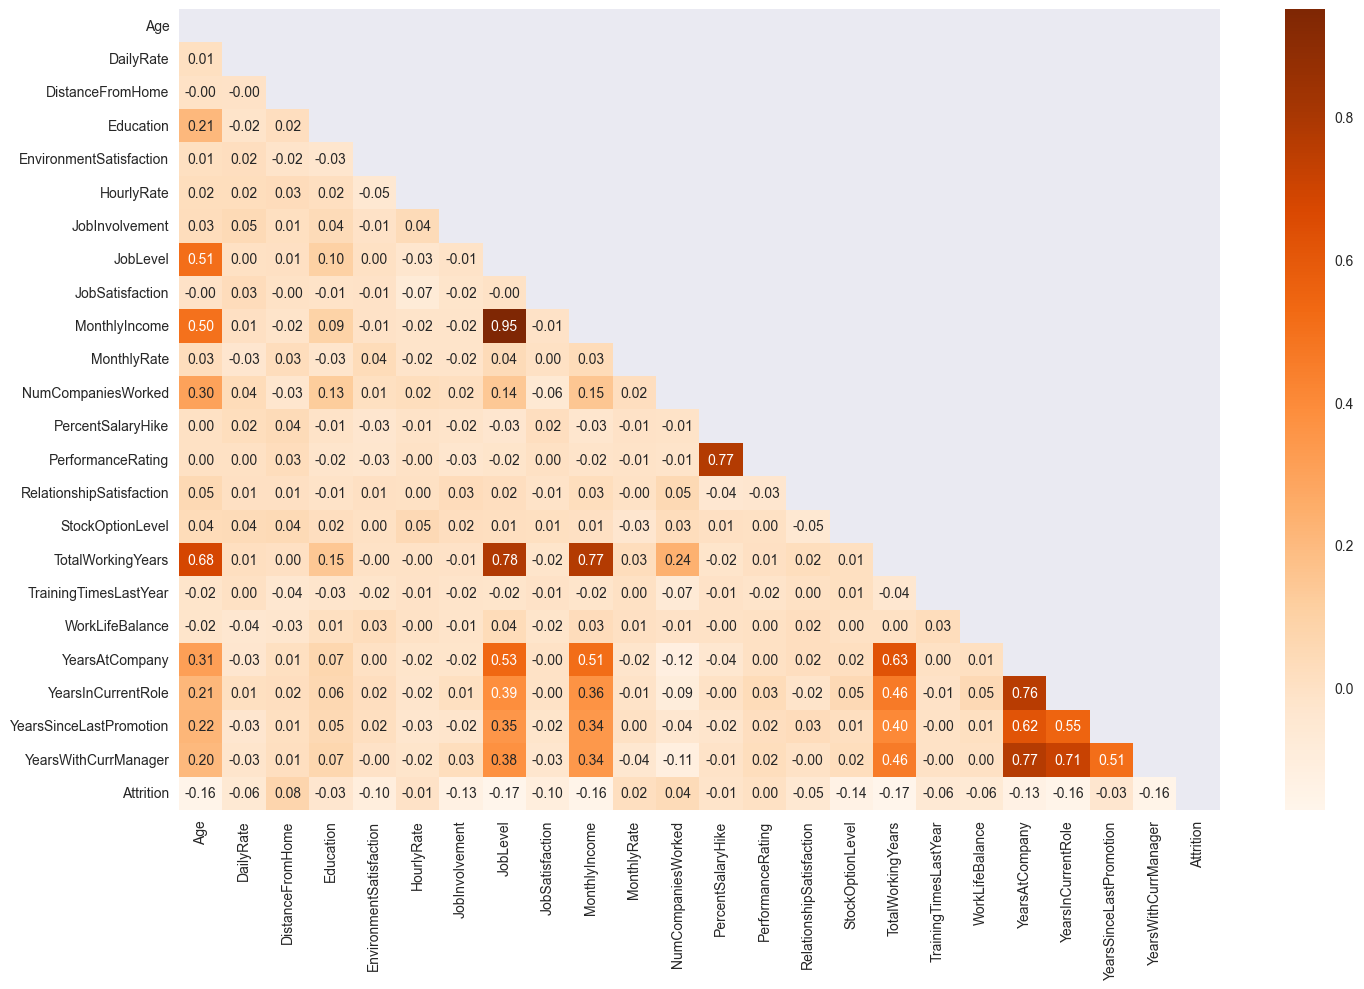

In [40]:
#We find visualization of the correlation relationships as well using the corr_score that we created
plt.figure(figsize =(15,10))
mask = np.triu(corr_score)
sns.heatmap(corr_score,cmap="Oranges",annot = True, fmt = '.2f',mask=mask)
plt.tight_layout()

In [50]:
#Now we drop attrition column to clean dataframe with only predictive features
y = df['Attrition']
df_c = df.drop(columns=['Attrition'])

In [51]:
#Use one hot encoding on non numerical features
df_c = pd.get_dummies(df_c,columns=['BusinessTravel','Gender','MaritalStatus'],drop_first=True)
df_c =pd.get_dummies(df_c)
df_c.head

<bound method NDFrame.head of       Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement 

In [47]:
#Check columns obtained after feature engineering
print(list(df_c.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Directo

In [48]:
#We filter out features that need to be standardized
standcol = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                   'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                   'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                   'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                   'YearsWithCurrManager']

In [49]:
#standadization of numerical features to have same type of normal distribution
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in standcol :
    df_c[col] = df_c[col].astype(float)
    df_c[[col]] = sc.fit_transform(df_c[[col]])
df_c.head

<bound method NDFrame.head of            Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527         -1.010909  -0.891688   
1     1.322365  -1.297775         -0.147150  -1.868426   
2     0.008343   1.414363         -0.887515  -0.891688   
3    -0.429664   1.461466         -0.764121   1.061787   
4    -1.086676  -0.524295         -0.887515  -1.868426   
...        ...        ...               ...        ...   
1465 -0.101159   0.202082          1.703764  -0.891688   
1466  0.227347  -0.469754         -0.393938  -1.868426   
1467 -1.086676  -1.605183         -0.640727   0.085049   
1468  1.322365   0.546677         -0.887515   0.085049   
1469 -0.320163  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0

In [52]:
#Now we need to do model training, and train test split(0.75,0.25)
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(df_c,y,test_size=0.25,stratify=y)
print('Training data has ' + str(x_train.shape[0]) + ' observations with ' + str(x_train.shape[1]) + ' features')
print('Test data has ' + str(x_test.shape[0]) + ' observations with ' + str(x_test.shape[1]) + ' features')

Training data has 1102 observations with 47 features
Test data has 368 observations with 47 features


In [54]:
#Now we build different machine learning models with same random state(in models that need random state)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score

lr = LogisticRegression(random_state=6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=6)
dt = DecisionTreeClassifier(random_state=6)
mlp = MLPClassifier(random_state=6)
xg = xgb.XGBClassifier(random_state=6)

In [56]:
# naive approach on each model without hyperparameter tuning
model_list = [lr,knn,rf,dt,mlp,xg]
score_res = []
for model in model_list:
    draft = model_selection.cross_val_score(model, x_train, y_train, cv = 5)
    score_res.append(draft)


In [57]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree','Neural Network','XG Boost']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression    KNN  Random Forest  Decision Tree  \
cv_1                0.837  0.801          0.860          0.774   
cv_2                0.837  0.824          0.851          0.756   
cv_3                0.827  0.827          0.868          0.786   
cv_4                0.841  0.823          0.868          0.745   
cv_5                0.836  0.827          0.850          0.782   

      Neural Network  XG Boost  
cv_1           0.652     0.855  
cv_2           0.846     0.855  
cv_3           0.841     0.850  
cv_4           0.673     0.864  
cv_5           0.832     0.864  


<AxesSubplot: >

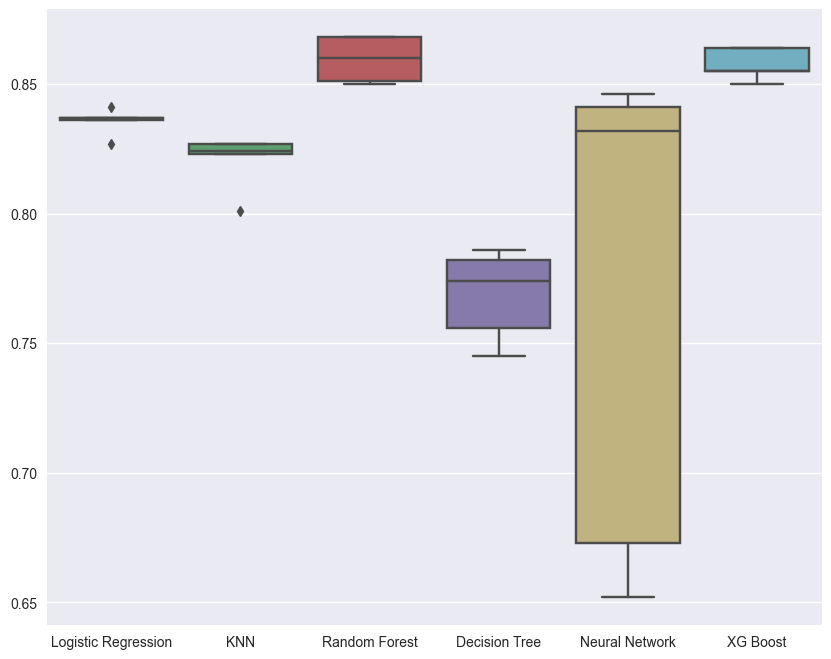

In [58]:
#visualization of the different ml models
plt.figure(figsize=(10,8))
sns.boxplot(data = df_accuracy)

In [59]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [61]:
# set kfold number for k fold cross validation method
kfold = model_selection.KFold(n_splits=10)

In [62]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [64]:
# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=6),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [65]:
lr_res = grid_lr.cv_results_

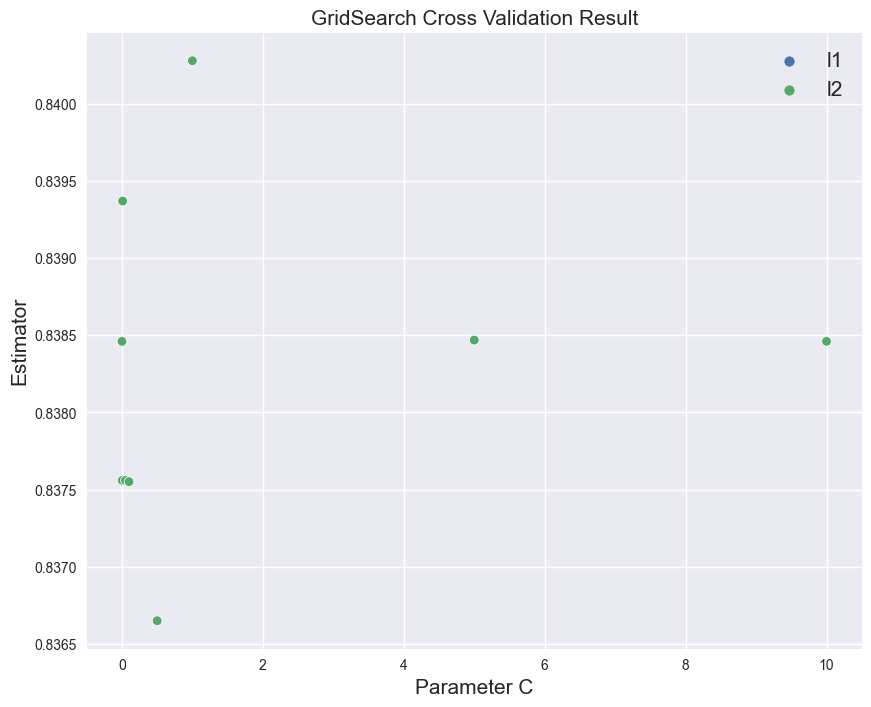

In [66]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)

In [67]:
#applying helper function to get best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.840
Best Parameters:
C : 1
penalty : l2


In [68]:
best_lr_model = grid_lr.best_estimator_

In [69]:
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

In [70]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}

In [72]:
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

In [73]:
knn_res = grid_knn.cv_results_

Text(0.5, 1.0, 'GridSearch Cross Validation Result')

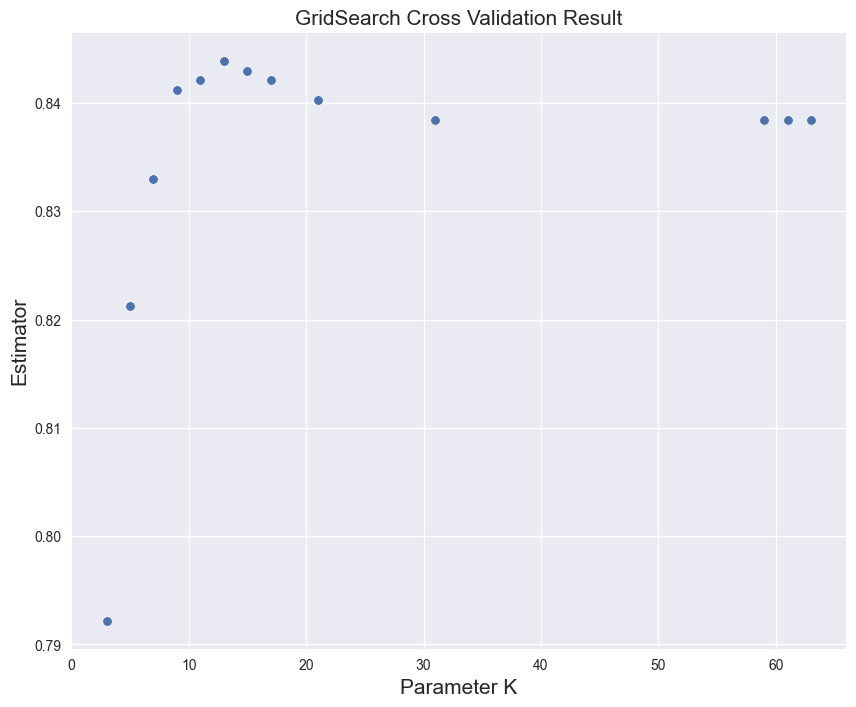

In [74]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_n_neighbors', y = 'mean_test_score',data = knn_res)
plt.xlabel('Parameter K',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)

In [75]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_knn)

Best Score: 0.844
Best Parameters:
n_neighbors : 13


In [76]:
best_knn_model = grid_knn.best_estimator_

In [77]:
# append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

In [79]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [80]:
#apply helper function to get best hyperparameter
get_grid_res(grid_rf)

Best Score: 0.863
Best Parameters:
max_depth : 15
max_features : sqrt
min_samples_split : 6
n_estimators : 80


In [81]:
rf_res = grid_rf.cv_results_

In [82]:
best_rf_model = grid_rf.best_estimator_

In [83]:
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

In [84]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [85]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)

Best Score: 0.840
Best Parameters:
max_depth : 5
min_samples_split : 10


In [86]:
best_dt_model = grid_dt.best_estimator_

In [87]:
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

In [89]:
# hyperparameter tuning for multi layer perceptrons
params_mlp = {
    'hidden_layer_sizes': [(10,),(20,),(30,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01, 0.1]
}
grid_mlp = GridSearchCV(mlp,params_mlp, cv = kfold)
grid_mlp.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(random_state=6),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(10,), (20,), (30,)]})

In [90]:
#apply helper function to get the best hyperparameter
get_grid_res(grid_mlp)

Best Score: 0.838
Best Parameters:
activation : tanh
alpha : 0.001
hidden_layer_sizes : (10,)


In [91]:
best_mlp_model = grid_mlp.best_estimator_

In [92]:
# append the best model to the list for other evalution
best_models.append(('Neural Network', best_mlp_model))

In [93]:
# hyperparameter tuning for extreme boosting tree aka xgboost
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'reg_alpha':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'reg_lambda':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'eta':[0.4,0.6,0.8],
        'learning_rate':[0.1, 0.3, 0.5]
        }

In [95]:
from sklearn.model_selection import RandomizedSearchCV
grid_xgb = RandomizedSearchCV(xg, params_xgb,cv = kfold,n_iter = 50)
grid_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_typ...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=6, ...),
                   n_iter=50,
                   param_distributions={'eta': [0.4, 0.6, 0.8],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [1, 5, 10, 15],
                                        'n_estimators': [40, 60, 80],
                                        'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1,
                                                      5],
                                        'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1,
                                                       5],
                                        'subsample': [0.4, 0.6, 0.8]})

In [96]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_xgb)

Best Score: 0.881
Best Parameters:
subsample : 0.6
reg_lambda : 5
reg_alpha : 0.5
n_estimators : 80
max_depth : 5
learning_rate : 0.5
eta : 0.6


In [97]:
best_xgb_model = grid_xgb.best_estimator_

In [98]:
# append the best model to the list for other evalution
best_models.append(('Extreme Boosting Tree', best_xgb_model))

In [99]:
# print out the list of optimized models
for name,model in best_models:
    print(name)

Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Neural Network
Extreme Boosting Tree


In [113]:
#help function to print out & visualize the evaluation results of each model and find conf matrix, precision-recall and f1 score
def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(x_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
        disp.plot()
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecall = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

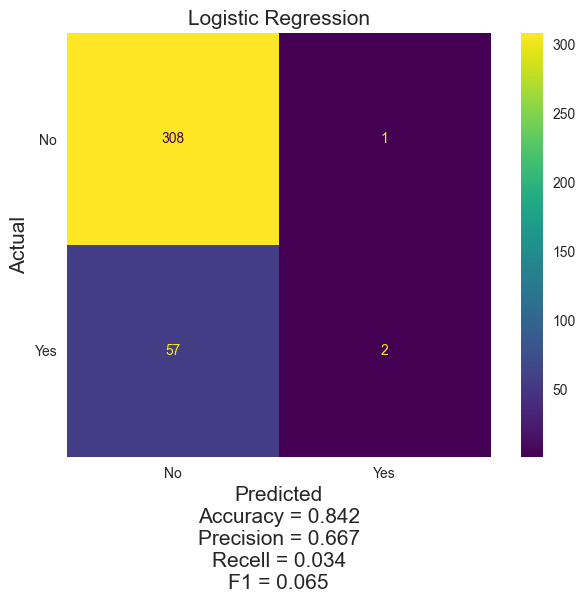

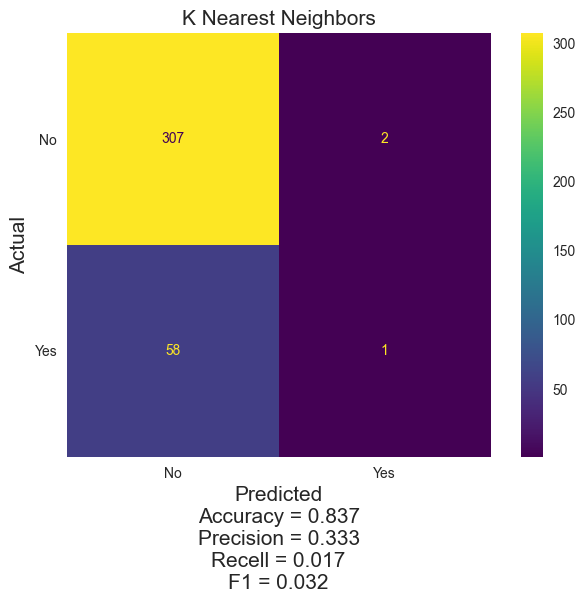

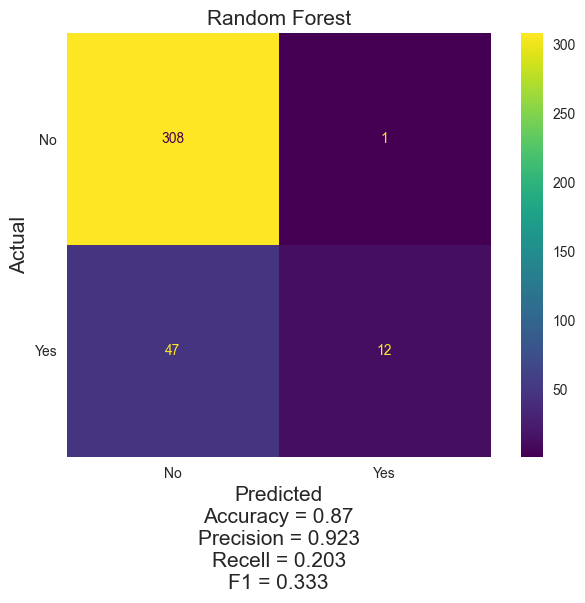

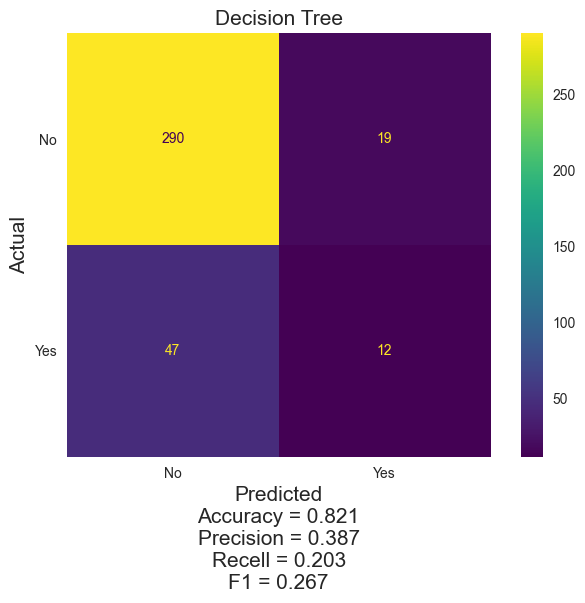

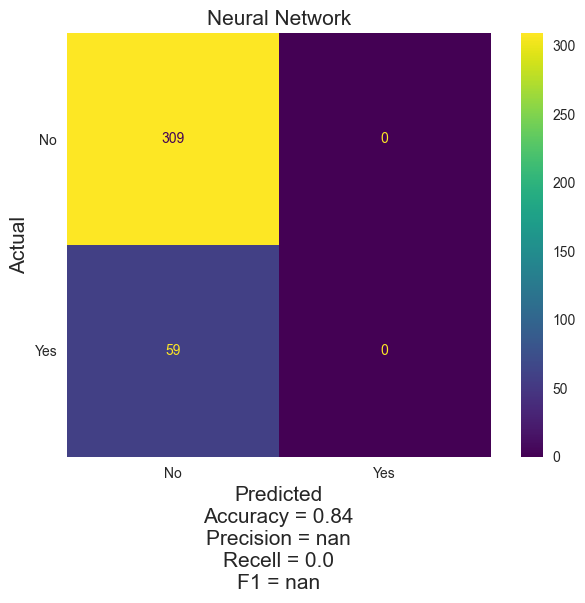

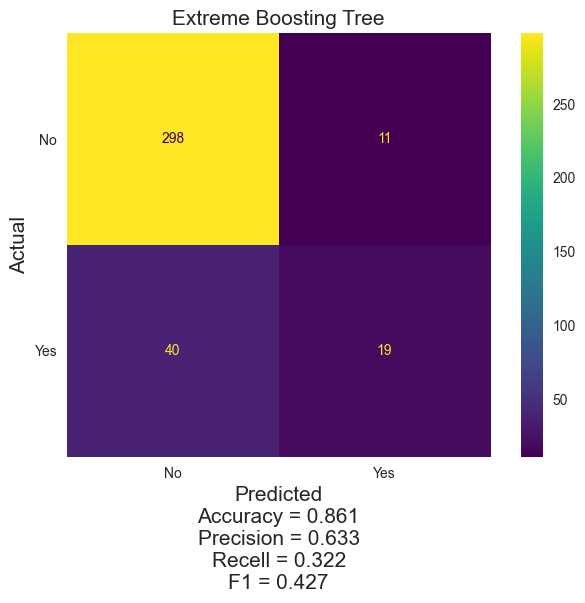

In [114]:
plot_cm(best_models)

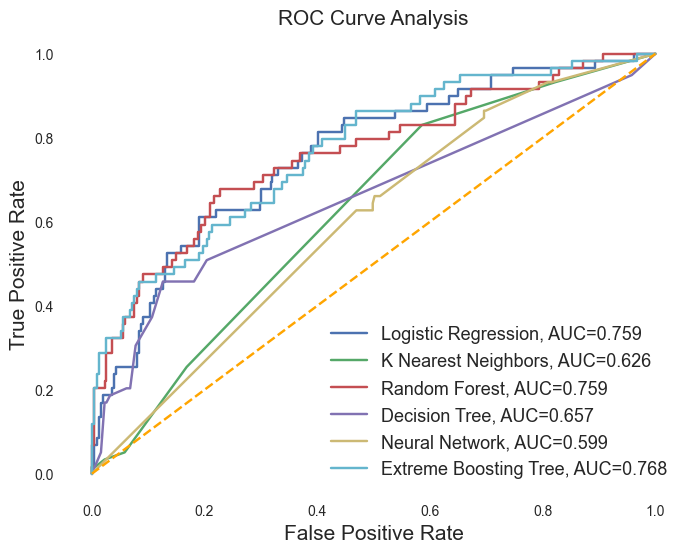

In [116]:
# visualize ROC curve for each optimized model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(x_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

In [117]:
# helper function to visualize feature importance from random forest and LASSO
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
    .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'blue')
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(imp_df.columns[1], fontsize = 20)
    plt.ylabel(imp_df.columns[0], fontsize = 20)
    plt.tight_layout()

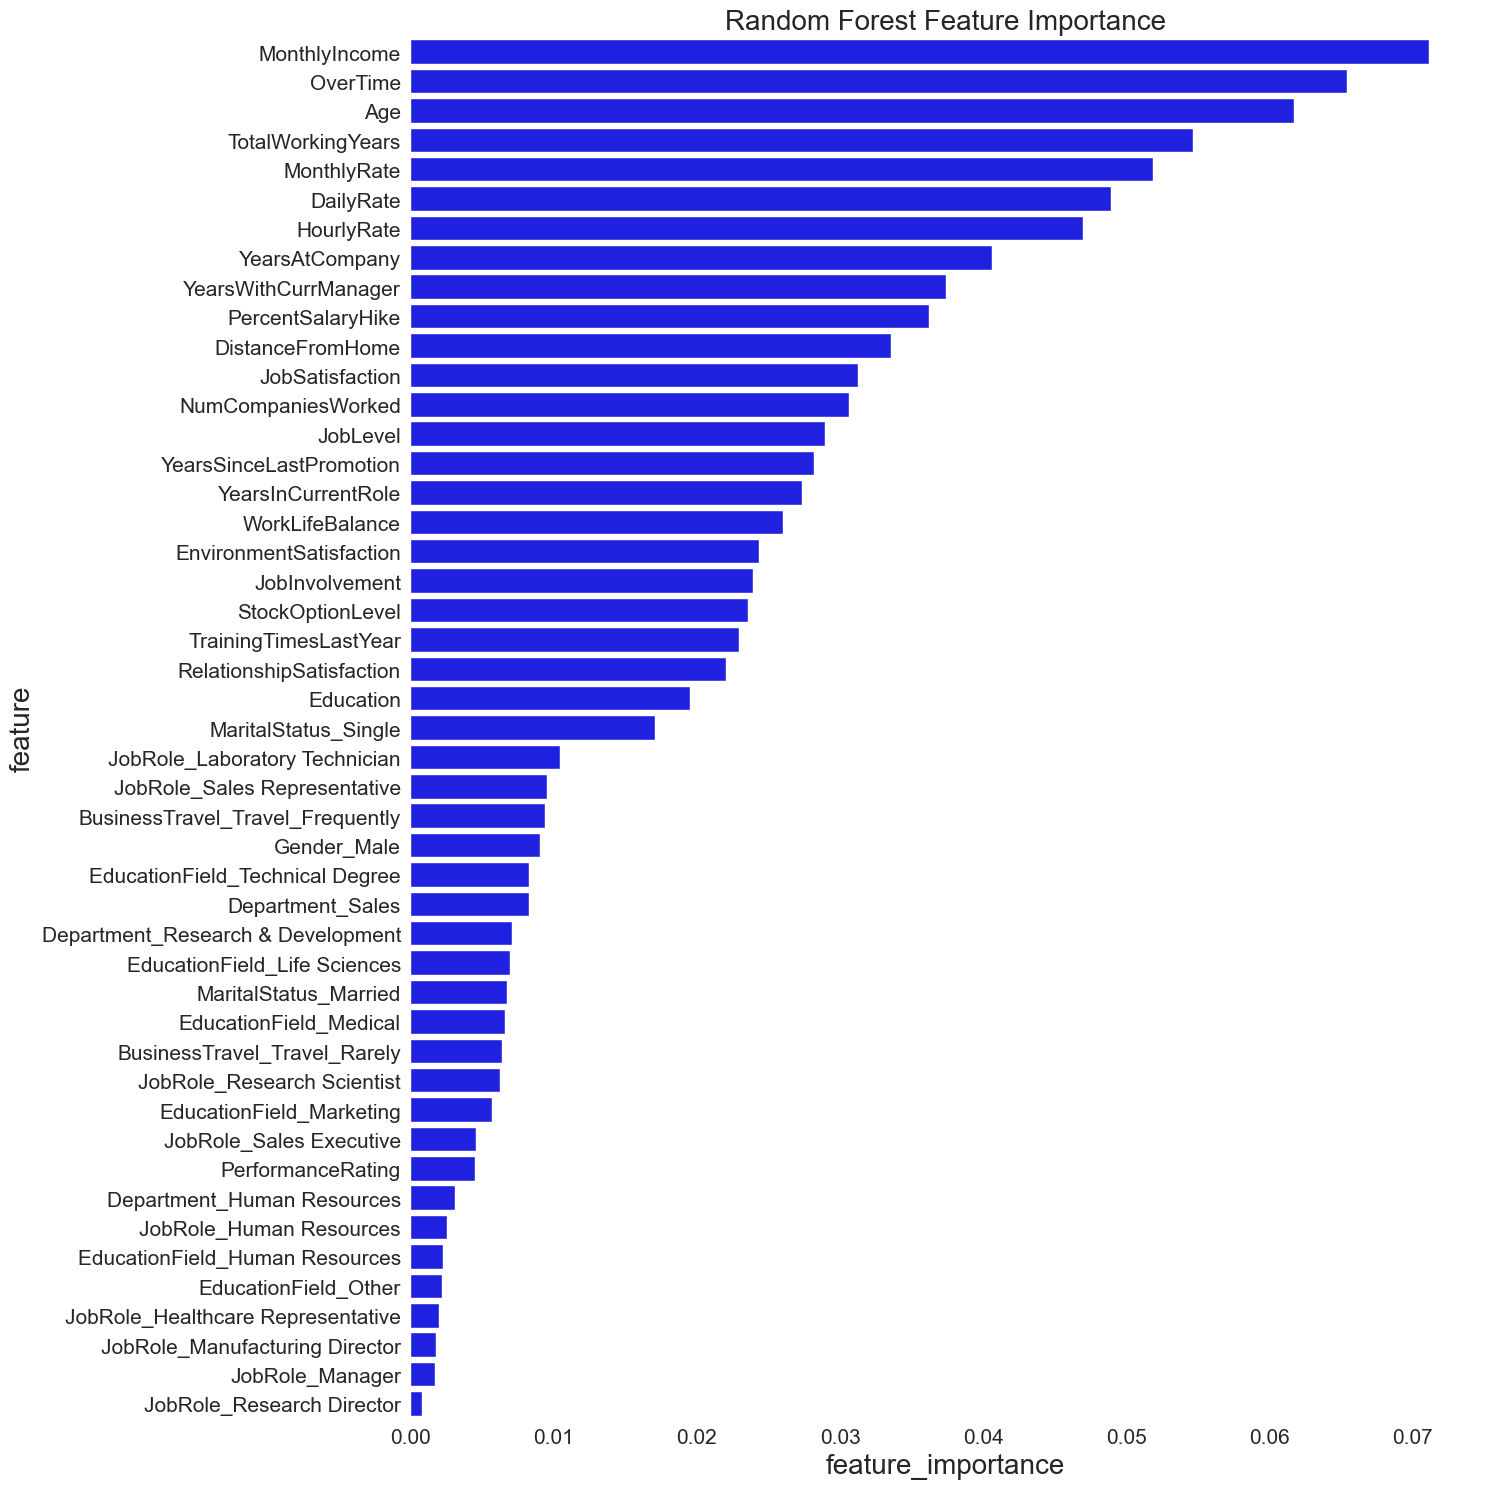

In [118]:
base_imp = imp_df(x_train.columns, best_rf_model.feature_importances_)
plt.figure(figsize=(15, 15))
var_imp_plot(base_imp, 'Random Forest Feature Importance')
plt.savefig('feature_importance.png')

In [119]:
# build a LASSO model for feature selection
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x_train, y_train)
coef = pd.DataFrame(reg.coef_, index = x_train.columns)
coef = imp_df(x_train.columns, reg.coef_)

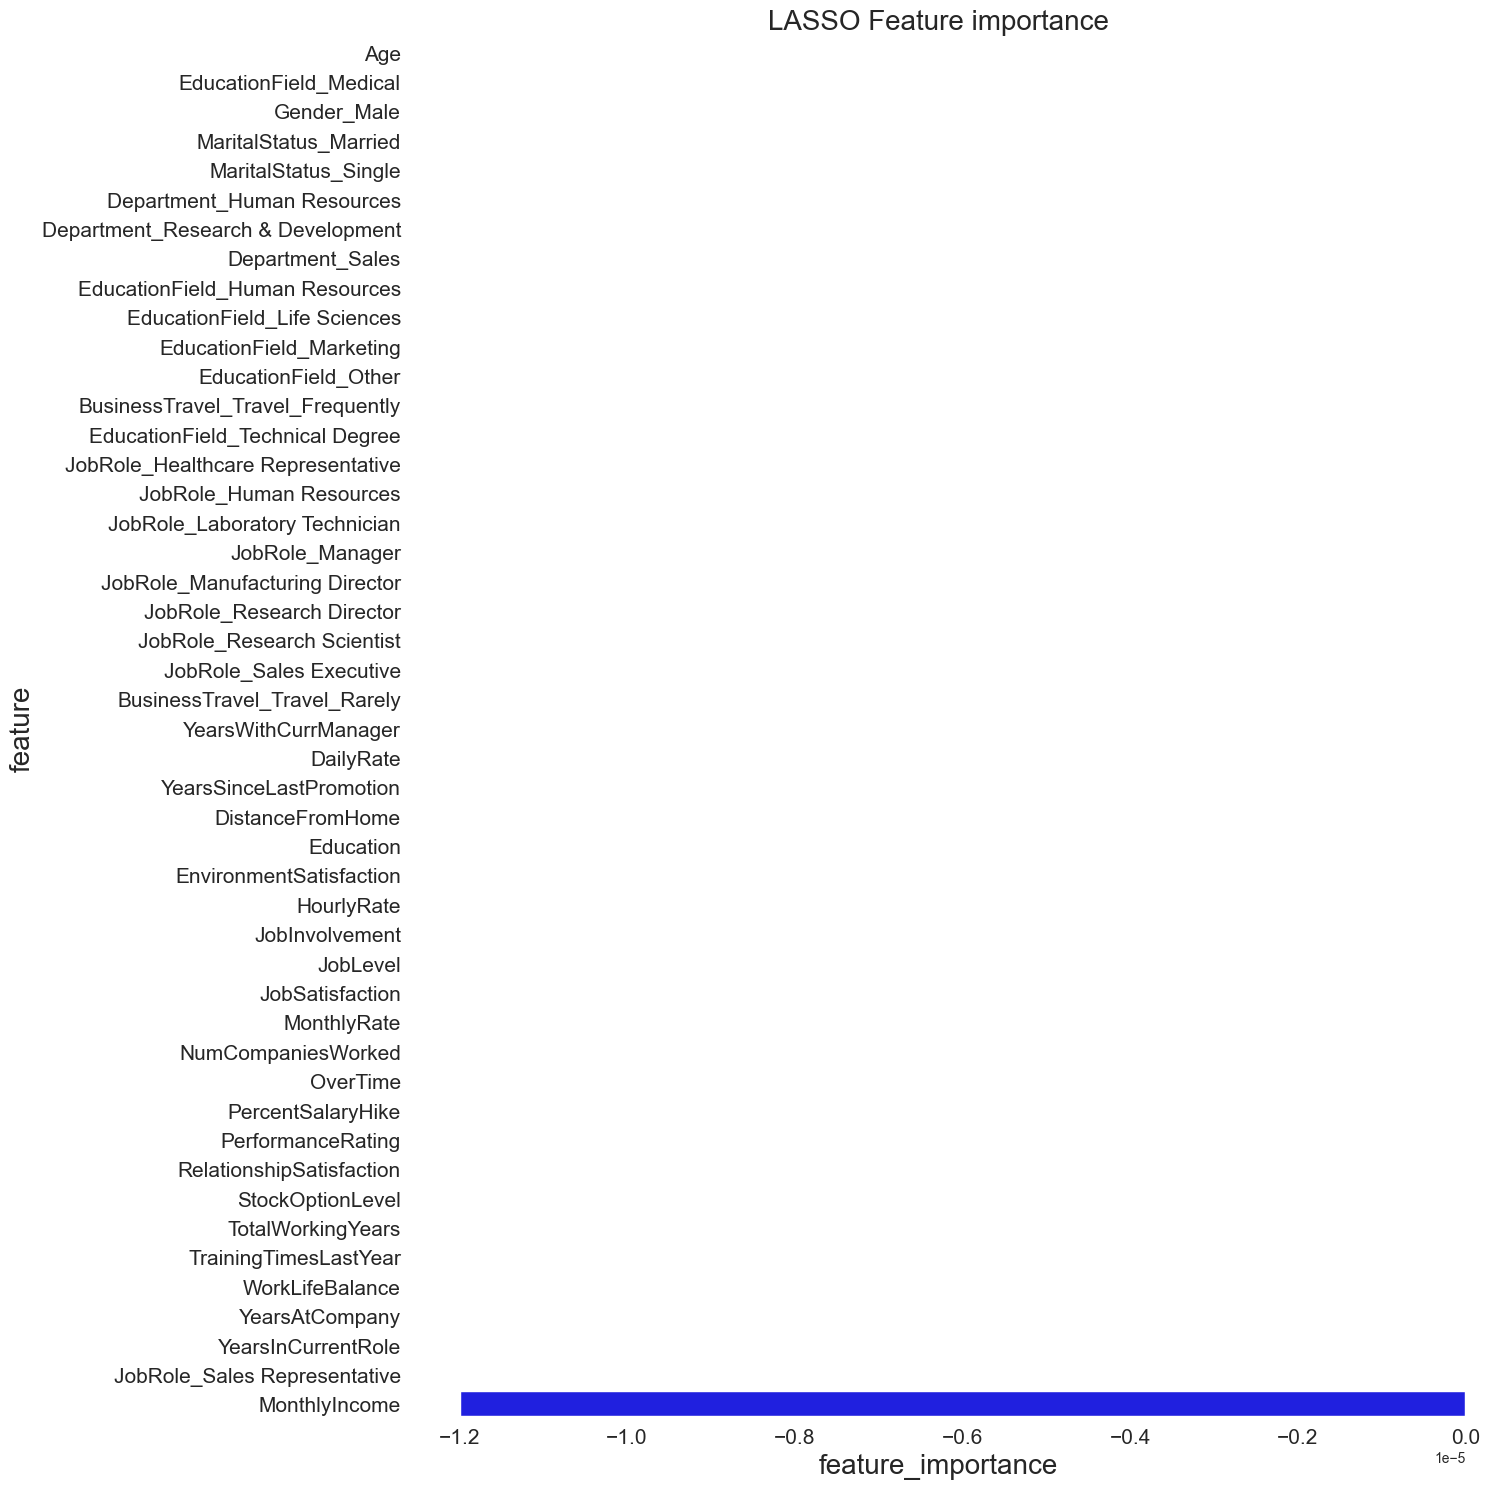

In [120]:
plt.figure(figsize=(15, 15))
var_imp_plot(coef, 'LASSO Feature importance')